In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7.0, 4.5)
plt.rcParams['font.size'] = 9
#plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0

In [5]:
raw_data = pd.read_csv("data/Indicators.csv")

In [6]:
raw_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.023330
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3000000.000000


In [7]:
chosen_indicators = ['NE.TRD.GNFS.ZS',  \
                     'SI.POV.2DAY', ]
df_indicators = raw_data[raw_data.IndicatorCode.isin(chosen_indicators)]

In [8]:
df_indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
347,East Asia & Pacific (all income levels),EAS,Trade (% of GDP),NE.TRD.GNFS.ZS,1960,26.807576
470,East Asia & Pacific (developing only),EAP,Trade (% of GDP),NE.TRD.GNFS.ZS,1960,17.454456
586,Euro area,EMU,Trade (% of GDP),NE.TRD.GNFS.ZS,1960,36.397362
698,Europe & Central Asia (all income levels),ECS,Trade (% of GDP),NE.TRD.GNFS.ZS,1960,39.045837
900,European Union,EUU,Trade (% of GDP),NE.TRD.GNFS.ZS,1960,38.782223


In [12]:
df_India = df_indicators[df_indicators.CountryName == 'India']

In [13]:
df_India.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11772,India,IND,Trade (% of GDP),NE.TRD.GNFS.ZS,1960,11.102136
36727,India,IND,Trade (% of GDP),NE.TRD.GNFS.ZS,1961,10.084315
64272,India,IND,Trade (% of GDP),NE.TRD.GNFS.ZS,1962,10.024983
92721,India,IND,Trade (% of GDP),NE.TRD.GNFS.ZS,1963,10.011762
121520,India,IND,Trade (% of GDP),NE.TRD.GNFS.ZS,1964,9.248361


In [84]:
# This function is for plotting the country data. 
# Inputs are : 
# indicator = the Indicator that we are interested in
# countryNameArray = list of Countries that we wanted to Check
# compareCountry = The country against which we want to compare the above countries

def plot_indicator(indicator, countryNameArray, compareCountry = None):
    plt.figure(figsize=(25,20))
    if compareCountry == None:
        for index, names in enumerate(countryNameArray):
            df_countryData = df_indicators[df_indicators.CountryName == names]
            ds_countryData = df_countryData[['IndicatorName','Year','Value']][df_countryData['IndicatorCode']==indicator]
            try:
                title = (ds_countryData['IndicatorName'] + " Of " + names).iloc[0]
            except:
                title = "None"

            xcountry = ds_countryData['Year'].values
            ycountry = ds_countryData['Value'].values

            plt.subplot(3, 3, index + 1)
            plt.plot(xcountry,ycountry,label=names)
            plt.title(title)
            plt.legend(loc=2)
    else:
        df_mainCountry = df_indicators[df_indicators.CountryName == compareCountry]
        ds_mainCountry = df_mainCountry[['IndicatorName','Year','Value']][df_mainCountry['IndicatorCode']==indicator]
        yCompareCountry = ds_mainCountry['Value'].values
        xCompareCountry = ds_mainCountry['Year'].values
        
        for index, names in enumerate(countryNameArray):
            df_countryData = df_indicators[df_indicators.CountryName == names]
            ds_countryData = df_countryData[['IndicatorName','Year','Value']][df_countryData['IndicatorCode']==indicator]
            try:
                title = (ds_countryData['IndicatorName'] + " Of " + names + " Vs " + compareCountry).iloc[0]
            except:
                title = "None"

            xcountry = ds_countryData['Year'].values
            ycountry = ds_countryData['Value'].values
            
            plt.subplot(3, 3, index + 1)
            plt.plot(xCompareCountry, yCompareCountry,marker = 'o', label = compareCountry)
            plt.plot(xcountry,ycountry,marker = 'o',label=names)
            plt.title(title)
            plt.legend(loc=2)

In [85]:
# Making a generalized function to plot any Country
def country_plot(countryNameArray, compareCountry=None):
    plot_indicator(chosen_indicators[0], countryNameArray, compareCountry)

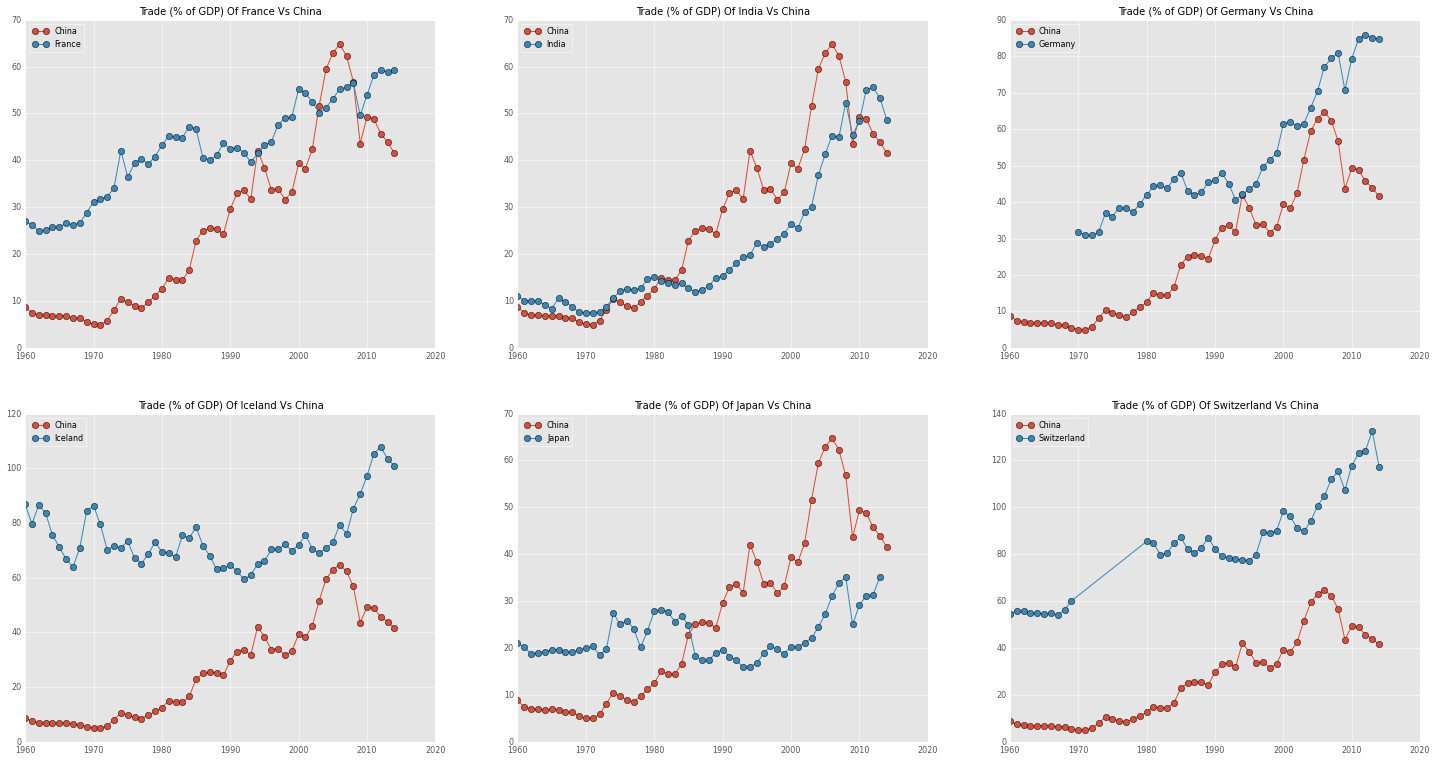

In [86]:
# Specify the countries here
countryNameArray = ["France", "India", "Germany", "Iceland", "Japan","Switzerland"]
compareCountry = "China"
country_plot(countryNameArray, compareCountry)